Objective :
This project aimed to analyze and predict Airbnb listing prices in New York City using real-world data. The major goals were:
1)Understand factors affecting price (location, room type, etc.)
2)Clean and explore the dataset
3)Build regression models to predict listing prices
4)Provide data-driven recommendations to Airbnb hosts

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")
df.info()
df.isnull().sum()
df




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
# Step 1: Data Cleaning
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1488930946.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [3]:
df['reviews_per_month'].fillna(0, inplace=True)  # Fill missing reviews
df

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1502112345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)  # Fill missing reviews


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


In [4]:
df.dropna(subset=['name', 'host_name'], inplace=True)  # Drop rows with missing critical info like name and host name 
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  number_

In [6]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df['price'].max()

10000

In [8]:
df = df[ (df['minimum_nights'] <= 365)]   # this gives true value rows only false values will be deleted by data frame 

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


In [10]:
df['price'].idxmax()     # this is row number not the actual id present in column

9151

In [11]:
df=df[(df['price']<=1000)]    # all other prices are outliers > 1000 so to remove that outliers 
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2


In [12]:
# Feature Engineering
df['has_reviews'] = df['number_of_reviews'] > 0
df['active_days_ratio_percentage'] = round((df['availability_365'] / 365)*100,2)
df

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\325465455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_reviews'] = df['number_of_reviews'] > 0
C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\325465455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['active_days_ratio_percentage'] = round((df['availability_365'] / 365)*100,2)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_reviews,active_days_ratio_percentage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,True,100.00
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,True,97.26
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,False,100.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,True,53.15
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,False,2.47
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,False,9.86
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,False,7.40
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,False,0.55


In [13]:
#  Group by host_id and host_name, count listings
host_counts = df.groupby(['host_id', 'host_name']).size().reset_index(name='listing_count')

#  Sort by listing_count and get top 5
top_5_hosts = host_counts.sort_values(by='listing_count', ascending=False).head(5)

print(top_5_hosts)


         host_id       host_name  listing_count
34451  219517861    Sonder (NYC)            327
29241  107434423      Blueground            232
19462   30283594            Kara            119
30905  137358866          Kazuya            103
14350   16098958  Jeremy & Laura             96


In [14]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_reviews,active_days_ratio_percentage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,True,100.00
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,True,97.26
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,False,100.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,True,53.15
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,True,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,False,2.47
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,False,9.86
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,False,7.40
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,False,0.55


    neighbourhood_group  neighbourhood  listing count_neighbourhood_district
0                 Bronx       Allerton                                    42
1                 Bronx     Baychester                                     7
2                 Bronx        Belmont                                    24
3                 Bronx      Bronxdale                                    19
4                 Bronx    Castle Hill                                     9
..                  ...            ...                                   ...
216       Staten Island    Tottenville                                     7
217       Staten Island  West Brighton                                    18
218       Staten Island    Westerleigh                                     2
219       Staten Island    Willowbrook                                     1
220       Staten Island        Woodrow                                     1

[221 rows x 3 columns]
  neighbourhood_group  listing_count
2           Man

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\3888646851.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='Set2')


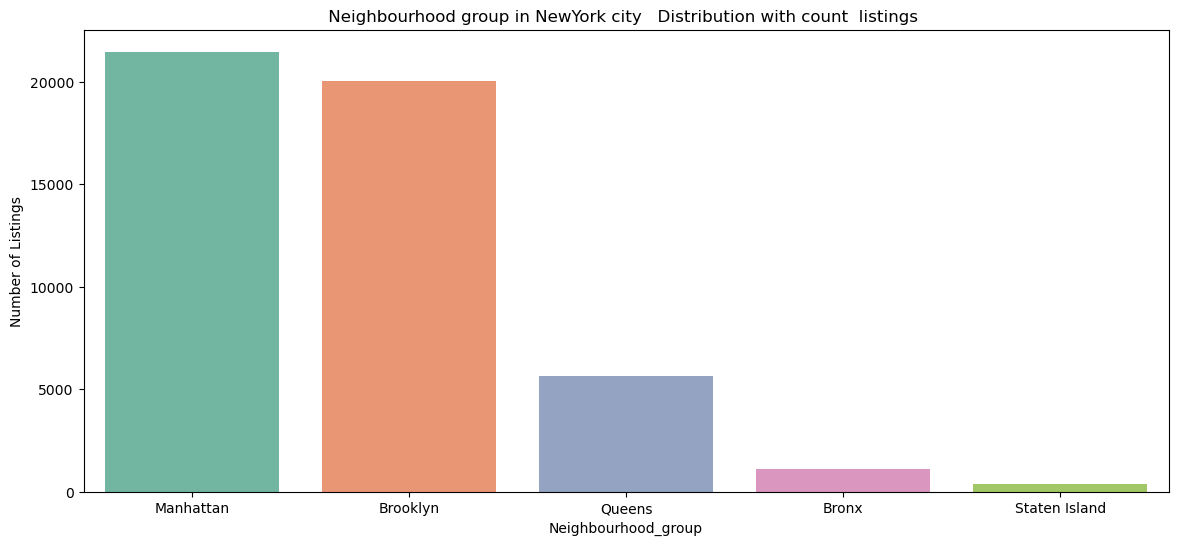

In [15]:
# DATA VISUALISATION
district = df.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='listing count_neighbourhood_district')
print(district)

# Group by neighbourhood_group and count listings
group_counts = df.groupby('neighbourhood_group').size().reset_index(name='listing_count')

# Sort by listing count and select top 5
groups = group_counts.sort_values(by='listing_count', ascending=False)

# Display the result
print(groups)

#  neighbourhood group Type Distribution with count  listings
plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index, palette='Set2')
plt.title(' Neighbourhood group in NewYork city   Distribution with count  listings  ')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Number of Listings')
plt.show()


In [16]:
# Set visual style
sns.set(style="whitegrid")

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1175622467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='Set2')
C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1175622467.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='Set3')


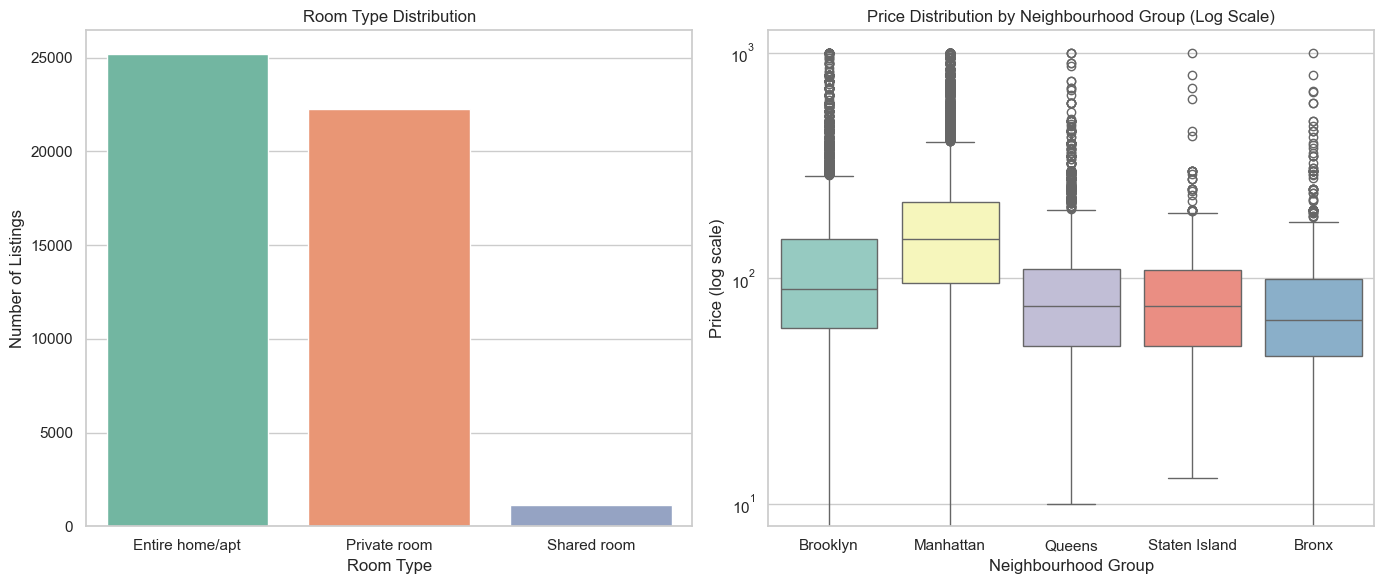

In [17]:
#  Room Type Distribution  entire home ,private room ,shared room
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, palette='Set2')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
#plt.show()

# Price Distribution by Neighborhood Group (log scale)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='neighbourhood_group', y='price', palette='Set3')
plt.yscale('log')
plt.title('Price Distribution by Neighbourhood Group (Log Scale)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (log scale)')

plt.tight_layout()
plt.show()

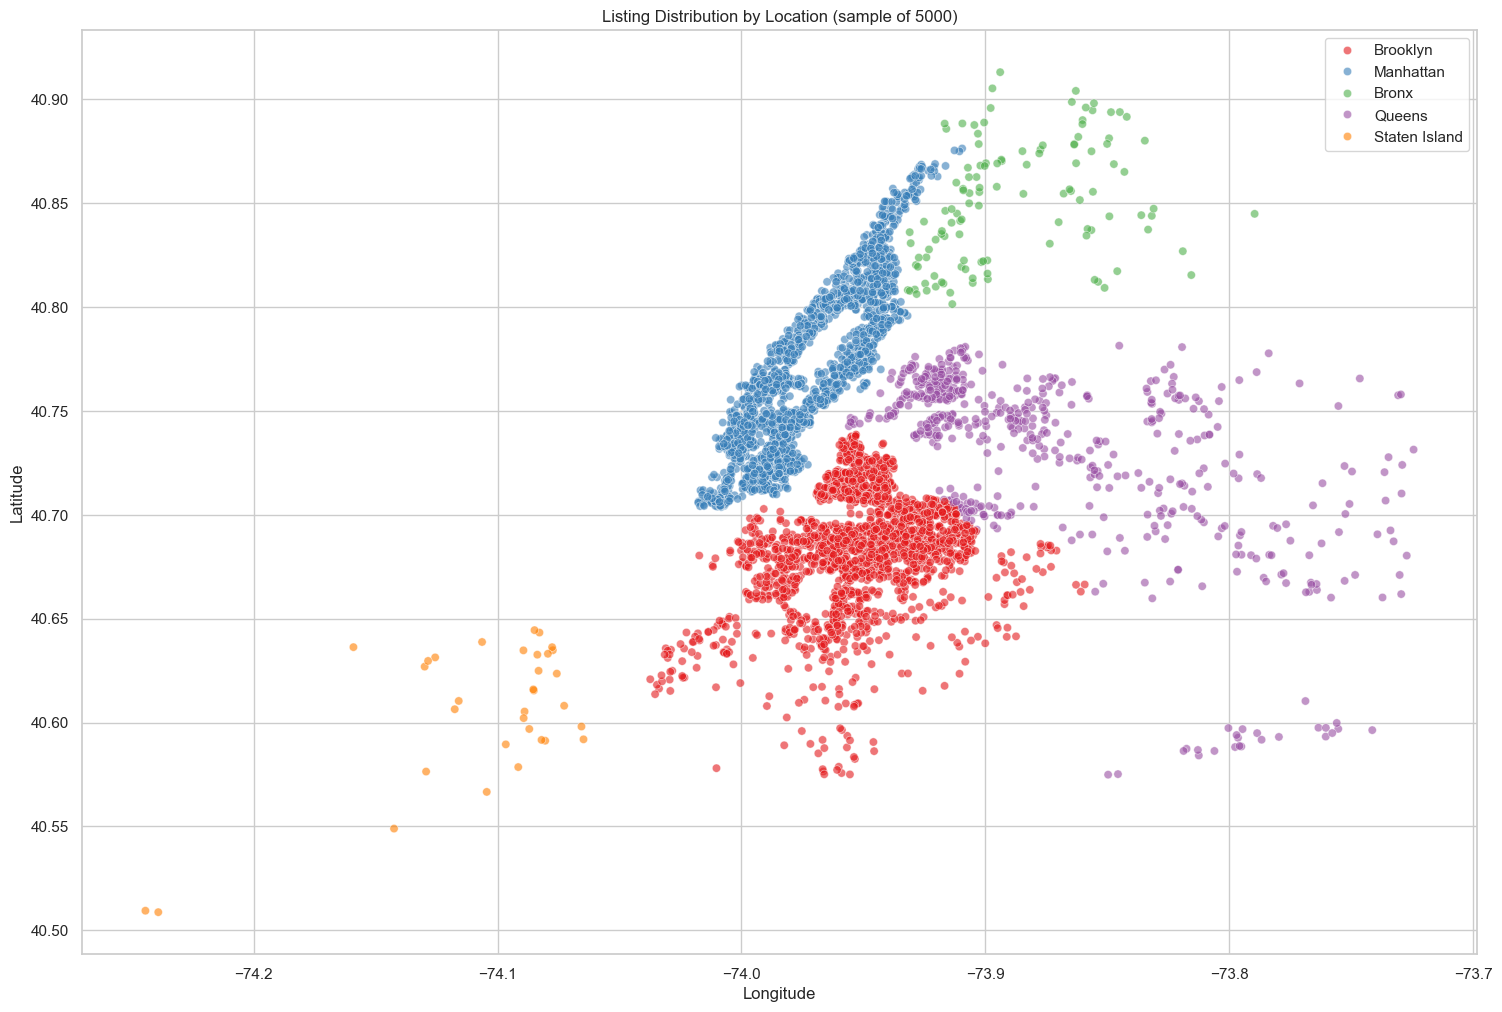

In [18]:
plt.figure(figsize=(18, 12))

#  Map-style scatter plot of listings
plt.subplot(1, 1, 1)
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6, palette='Set1')
plt.title('Listing Distribution by Location (sample of 5000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')

plt.show()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1570182143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['price'] < 500], x='room_type', y='price', palette='Set2')


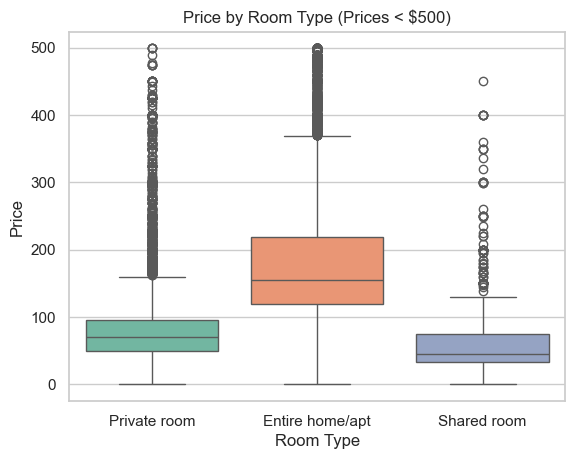

C:\Users\Aniket\AppData\Local\Temp\ipykernel_206688\1570182143.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['price'] < 200], x='room_type', y='price', palette='Set2')


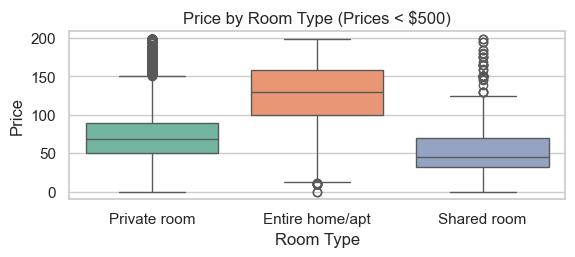

In [19]:
#  Boxplot of price vs. room type (only for price < $500)
plt.subplot(1, 1, 1)
sns.boxplot(data=df[df['price'] < 500], x='room_type', y='price', palette='Set2')
plt.title('Price by Room Type (Prices < $500)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()
#  Boxplot of price vs. room type (only for price < $500)
plt.subplot(2, 1, 1)
sns.boxplot(data=df[df['price'] < 200], x='room_type', y='price', palette='Set2')
plt.title('Price by Room Type (Prices < $500)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

 Key Insights from EDA
 Location & Price:
Listings in Manhattan and Brooklyn are significantly more expensive than those in Queens, Bronx, or Staten Island.
Entire home/apartment is the most costly room type; shared rooms are the cheapest.

Room Type:
Private rooms are the most common room type, followed by entire homes.
Room type heavily influences listing prices.

 Geographic Distribution:
Scatterplot analysis showed high concentration of listings in tourist-dense areas like Manhattan.
Most outliers in price come from luxury areas in Manhattan.

 Reviews & Availability:
Many listings have zero reviews, but reviews_per_month helps identify consistently active hosts.
Hosts with high availability (availability_365) don’t always charge higher prices.

 Correlation Insights:
Price shows low direct correlation with most numeric variables, suggesting that categorical features (like room type and location) play a major role.

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


In [25]:
# Define Features and Target
features = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'availability_365', 'active_days_ratio_percentage']

X = df[features]
y = df['price']

#  One-Hot Encoding for Categorical Variables
categorical_features = ['neighbourhood_group', 'room_type']
numerical_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'active_days_ratio']

# Define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  1. Linear Regression Model Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# Train Linear Regression
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate Linear Regression
print("\n Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))




#  2. XGBoost Regressor Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1))
])

# Train XGBoost
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate XGBoost
print("\n XGBoost Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))


 Linear Regression:
RMSE: 96.99013928085574
R² Score: 0.30330501336235915

 XGBoost Regressor:
RMSE: 92.40123100433333
R² Score: 0.3676711320877075


CONCLUSION:

 Pricing Recommendations to Maximize Airbnb Host Revenue
1. Leverage High-Demand Locations
Manhattan and Brooklyn have the highest demand and pricing power.
If your listing is in these boroughs, charge a premium while ensuring competitive features (cleanliness, amenities, etc.).
For less central areas (e.g., Bronx or Staten Island), price more affordably to attract budget travelers.

2. Choose the Right Room Type
Entire home/apartment listings command the highest prices — ideal for families and tourists who value privacy.
If hosting an entire property is not possible, aim for a private room over a shared room to earn more.
Avoid pricing shared rooms too high; they have limited pricing flexibility due to low demand.

3. Adjust Price Based on Minimum Stay
Listings with minimum_nights > 30 may discourage travelers.
Use flexible minimum night settings to attract both short-term and long-term stays.
Consider discounts for weekly/monthly bookings to reduce vacancy and increase occupancy.

4. Stay Available Year-Round
Listings with high availability_365 have more opportunities to earn.
Try to keep your listing active for most of the year unless seasonality or maintenance requires downtime.

5. Encourage More Reviews
Listings with higher number of reviews or reviews per month often perform better in Airbnb search.
Encourage guests to leave reviews — offer a great experience and follow up with a polite request.
More reviews build trust and allow for higher pricing.

6. Use Dynamic Pricing
Avoid setting a fixed price all year.
Use tools (like Airbnb’s Smart Pricing or external services) or build your own logic using:
Seasonality
Local events
Competitor pricing
Historical demand patterns

7. Avoid Overpricing
From EDA, prices above $500–1000 are rare and mostly luxury-based — check your competitors before setting a high price.
Overpriced listings stay vacant, especially in competitive areas or with low reviews.

8. Offer High-Value Amenities
Even simple additions like fast Wi-Fi, workspace, and air conditioning can help justify higher prices.
Clearly list all amenities and update them regularly in your profile.
